In [2]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
# yield_rates

stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
# bank_data.head()

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
# yield_spread.head()

yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
# bank_yield_final.head()
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


In [3]:
dividend_frame = pd.read_csv('data/banks/RY.TO_dividend_extremes.csv', index_col=0)

dividend_yields = []

for i in range(0, len(dividend_frame)):
    div_yield = 400 * (dividend_frame.loc[i]['Dividends'] / dividend_frame.loc[i]['Adj Close'])
    dividend_yields.append(div_yield)

dividend_frame['Dividend Yield'] = dividend_yields
dividend_frame['Month'] = pd.DatetimeIndex(dividend_frame['Date']).month
# dividend_frame
yearly_yield = dividend_frame.loc[dividend_frame['Month'] == 10].reset_index(drop=True)
# print()
dividend_range = df['1995-01-19':'2023-7-24']
# dividend_range

In [4]:
from datetime import datetime

yield_list = []

for i in range(len(yearly_yield) - 1):

    div_yield = yearly_yield.loc[i]['Dividend Yield']

    start_point = yearly_yield.loc[i]['Date']
    end_point = yearly_yield.loc[i+1]['Date']
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    quarter_len = len(dividend_range[start_point: date_str])

    for j in range(quarter_len):
        yield_list.append(div_yield)

# print(len(yield_list))
spread_yield_3 = df['1995-10-23':'2022-10-24'].copy()
spread_yield_3['Dividend Yield'] = yield_list
spread_yield_3

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
1995-10-23,1995-10-23,0.31,0.69,2.727312,-4.769766,Negative Extreme,11.366503
1995-10-24,1995-10-24,0.34,0.64,2.751025,0.869464,Non-Extreme,11.366503
1995-10-25,1995-10-25,0.36,0.61,2.703596,-1.724048,Non-Extreme,11.366503
1995-10-26,1995-10-26,0.45,0.68,2.739644,1.333335,Non-Extreme,11.366503
1995-10-27,1995-10-27,0.41,0.64,2.787073,1.731210,Non-Extreme,11.366503
...,...,...,...,...,...,...,...
2022-10-18,2022-10-18,-0.42,-0.03,119.302925,0.501696,Non-Extreme,3.490205
2022-10-19,2022-10-19,-0.41,0.07,118.419205,-0.740736,Non-Extreme,3.490205
2022-10-20,2022-10-20,-0.38,0.15,116.930313,-1.257306,Non-Extreme,3.490205


In [5]:
#multiple linear regression model

from sklearn import linear_model
import matplotlib.pyplot as plt

# df = ry_copy.copy()
# column_2 = 'Dividend Yield' , 'Price/Book'

def MLR(df, column_2):
    X = df[['spread_10_3', '{}'.format(column_2)]]
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X,y)
    fitted_values = regr.predict(df[['spread_10_3', '{}'.format(column_2)]])
    df['Fitted Values'] =  fitted_values

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    print('R-Squared: {}'.format(regr.score(X,y)))

    print(regr.coef_)
    print(regr.feature_names_in_)
    print(regr.intercept_)
    # print(df)
    return regr

In [6]:
df_2023 = df['2023-02-08'::].copy()
div_yield_2023 = yearly_yield.loc[27]['Dividend Yield']

div_yield_list = []
for i in range(len(df_2023)):
    div_yield_list.append(div_yield_2023)

df_2023['Dividend Yield'] = div_yield_list
df_2023

# degrees of freedom = 175 - (2 + 1) = 172
# alpha = 0.05

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
2023-02-08,2023-02-08,-0.82,-1.09,136.775894,0.670900,Non-Extreme,4.25846
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846
...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846


In [7]:

# bear_market_99
# MLR(bear_market_99, 'Dividend Yield')

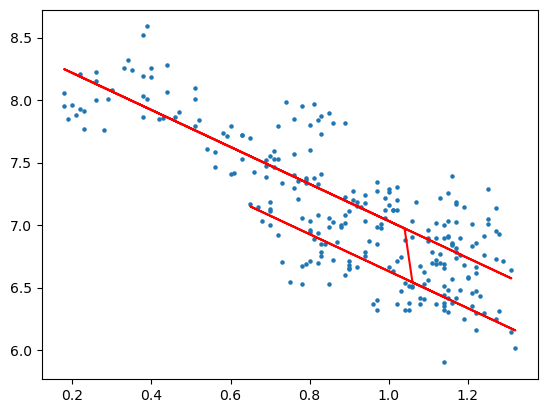

R-Squared: 0.7402693455363282
[-1.48151994 -0.67607245]
['spread_10_3' 'Dividend Yield']
13.097920302098371


,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield,Fitted Values,Adj Fitted,Residuals
Date,,,,,,,,,,
2023-02-09,2023-02-09,-0.81,-1.10,136.481857,-0.214977,Non-Extreme,4.25846,11.848564,136.947130,-0.465273
2023-02-10,2023-02-10,-0.76,-1.05,136.001587,-0.351893,Non-Extreme,4.25846,11.774488,136.090951,-0.089364
2023-02-13,2023-02-13,-0.80,-1.09,136.227020,0.165758,Non-Extreme,4.25846,11.833749,136.775894,-0.548874
2023-02-14,2023-02-14,-0.83,-1.03,136.089813,-0.100719,Non-Extreme,4.25846,11.744858,135.748479,0.341334
2023-02-15,2023-02-15,-0.81,-0.98,135.913391,-0.129636,Non-Extreme,4.25846,11.670782,134.892300,1.021091
...,...,...,...,...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme,4.25846,11.255957,130.097696,-16.447694
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme,4.25846,11.137435,128.727809,-15.697810
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme,4.25846,11.181881,129.241517,-18.231515


In [8]:
bear_market_99 = spread_yield_3['1999':'2000-01-24'].copy()
fitted_values = MLR(bear_market_99, 'Dividend Yield').predict(df_2023[['spread_10_3', 'Dividend Yield']])
df_2023['Fitted Values'] = fitted_values

starting_price = df_2023.loc['2023-02-08']['Adj Close']
# print(starting_price)

adj_fitted = []

for i in range(len(fitted_values) - 1):
    ratio = fitted_values[i+1]/ fitted_values[i]
    starting_price = starting_price * ratio
    adj_fitted.append(starting_price)

# print(adj_fitted)
# print(len(adj_fitted))

df_2023_adj = df_2023['2023-02-09'::].copy()
actuals = df_2023_adj['Adj Close']

residuals = []

for (i, j) in zip(actuals, adj_fitted):
    # print('actual = {x}, fitted = {y}'.format(x=i,y=j))
    residuals.append(i - j)

df_2023_adj['Adj Fitted'] = adj_fitted
df_2023_adj['Residuals'] = residuals
df_2023_adj


1.9739339540980687


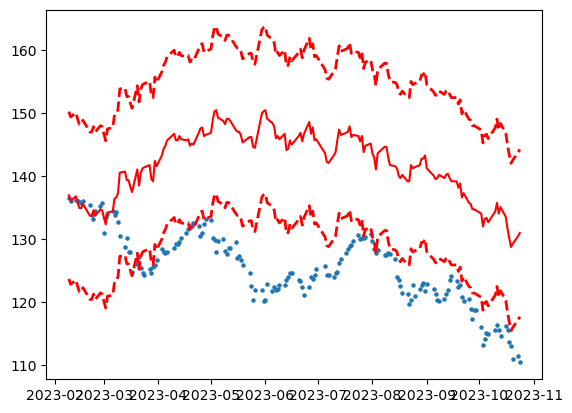

In [9]:
from scipy.stats import t
import numpy as np

critical_value = t.ppf(q = 1-0.025, df = 171) # critical value
print(critical_value)
std_error = np.std(residuals)

band_width = critical_value * std_error

upper = []
lower = []

for i in adj_fitted:
    upper.append(i + band_width)
    lower.append(i - band_width)

x = df_2023_adj['Date']
y = df_2023_adj['Adj Close']
y_hat = df_2023_adj['Adj Fitted']
plt.scatter(x, y, s=5)
plt.plot(x, y_hat, color = 'red')
plt.plot(x, upper, 'r--', lw = 2)
plt.plot(x, lower, 'r--', lw = 2)
plt.show()

In [10]:
df_2023_adj['Upper'] = upper
df_2023_adj['Lower'] = lower

predictions_2023 = df_2023_adj.copy().drop(columns=['Date', 'spread_10_2','Delta', 
                                                    'Extremes', 'Dividend Yield', 'Fitted Values'])
predictions_2023.to_csv('predictions_2023.csv')

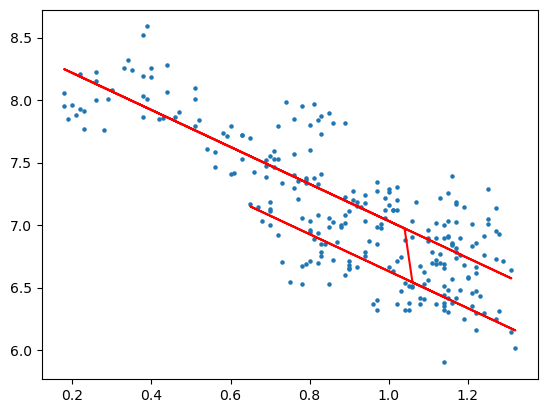

R-Squared: 0.7402693455363282
[-1.48151994 -0.67607245]
['spread_10_3' 'Dividend Yield']
13.097920302098371


In [11]:
MLR(bear_market_99, 'Dividend Yield')
bear_regression_99 = bear_market_99.copy().drop(columns=
                                                ['Date', 'spread_10_2', 'Delta', 'Extremes', 'Dividend Yield'])
bear_regression_99.to_csv('bear_regression_99.csv')

